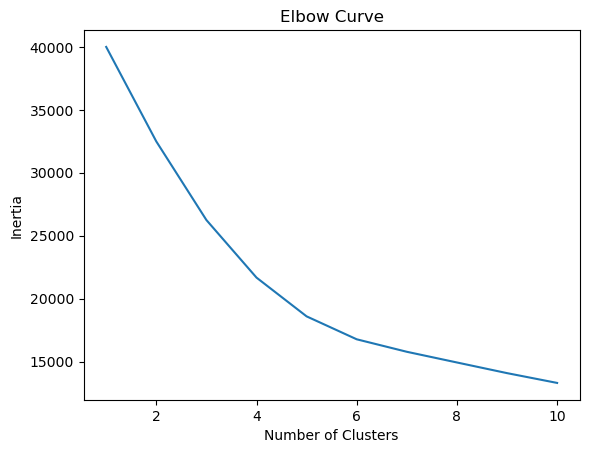

Cluster Counts:
+---+---------+-------+
|   | Cluster | Count |
+---+---------+-------+
| 0 |    3    | 3674  |
| 1 |    0    | 3546  |
| 2 |    1    | 1494  |
| 3 |    2    | 1286  |
+---+---------+-------+


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import seaborn as sns

# Read the data into a DataFrame
data = pd.read_csv('churn_clean.csv')

# Select the columns relevant for analysis
columns = ['Population', 'Age', 'Income', 'Outage_sec_perweek']
churn_data = data[columns]

# Remove any rows with missing values
churn_data = churn_data.dropna()

# Standardize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(churn_data)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Choose the optimal number of clusters based on the Elbow curve
k = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(normalized_data)

# Assign cluster labels to the original data
churn_data['Cluster'] = kmeans.labels_

# Analyze the results
cluster_counts = churn_data['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Generate the table using tabulate
table = tabulate(cluster_counts, headers='keys', tablefmt='pretty')

# Print the table
print("Cluster Counts:")
print(table)

# Save the cleaned data to a CSV file
churn_data.to_csv('D212_p1_cleaned_churn_data.csv', index=False)

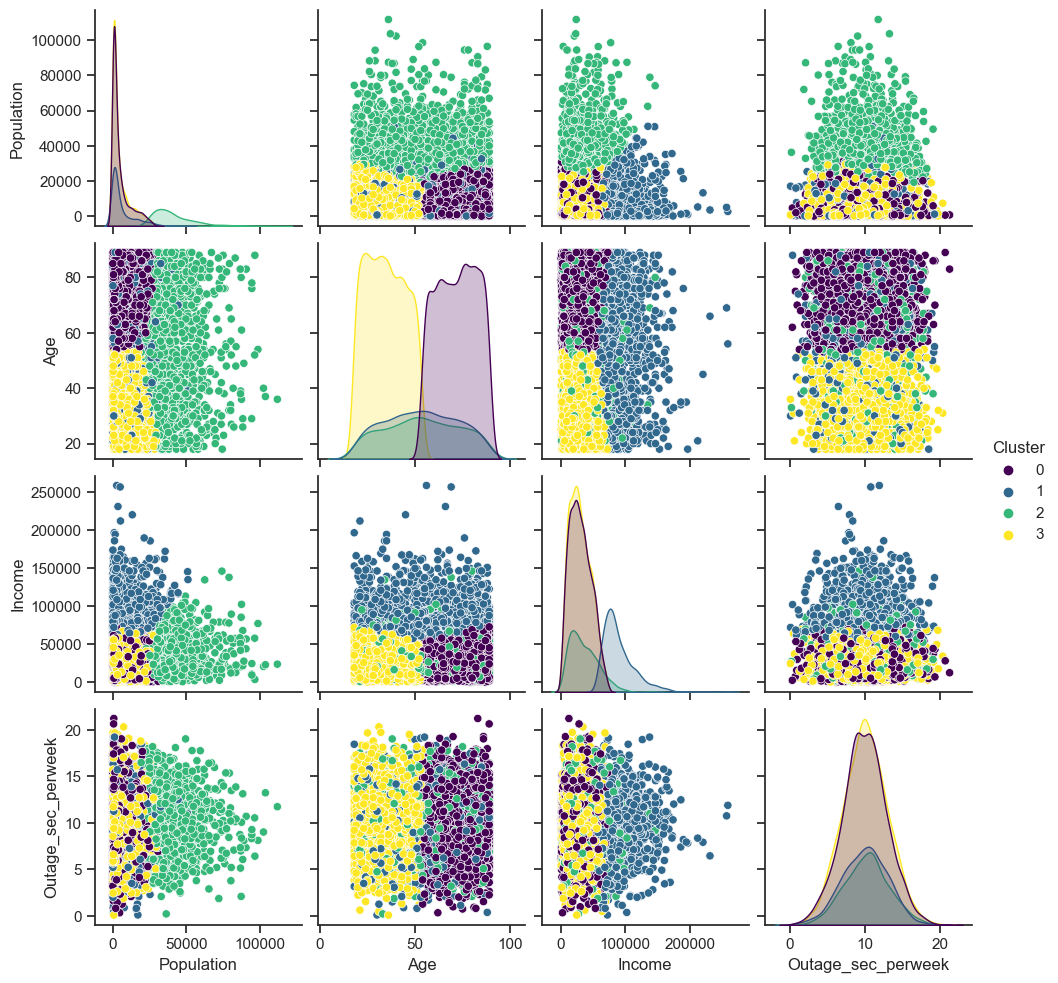

In [2]:
# Assign cluster labels to the original data
churn_data['Cluster'] = kmeans.labels_

# Create a scatter plot matrix
sns.set(style="ticks")
sns.pairplot(churn_data, vars=columns, hue="Cluster", palette="viridis")

# Display the plot
plt.show()

In [3]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette coefficient
silhouette_avg = silhouette_score(normalized_data, kmeans.labels_)

# Print the result
print(f"Silhouette Coefficient: {silhouette_avg}")

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(normalized_data)

# Get inertia
inertia = kmeans.inertia_

# Print the result
print(f"Inertia: {inertia}")

Silhouette Coefficient: 0.24652473394322347
Inertia: 21671.86136677635


In [4]:
from tabulate import tabulate
# Get the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)

# Generate the table using tabulate
table = tabulate(cluster_centers, headers=columns, tablefmt='pretty')

# Print the table
print(table)

+---+----------------------+----------------------+----------------------+-----------------------+
|   |      Population      |         Age          |        Income        |  Outage_sec_perweek   |
+---+----------------------+----------------------+----------------------+-----------------------+
| 0 | -0.3343022632826358  |  0.908739549178621   | -0.33932026376724905 | -0.018080023158850808 |
| 1 | -0.2442863027019524  | 0.008234162462344128 |  1.7805616973890732  | -0.02241342218666383  |
| 2 |  2.1549897564658935  | 0.031151676843221798 | -0.1349153734683525  |  0.0637192814644771   |
| 3 | -0.33233891425853285 | -0.8896183335578641  | -0.34989561954113857 | 0.0042438162182201955 |
+---+----------------------+----------------------+----------------------+-----------------------+
